# 🖼️ Part 3: Matplotlib Subplots and Dashboard Layouts

**Goal:** Master the creation of multi-panel visualizations (dashboards) using the Object-Oriented (`plt.subplots`) and advanced layout (`plt.subplot2grid`) interfaces for professional presentation.

---
### Key Learning Objectives
1.  Use `plt.subplot()` and `fig, axes = plt.subplots()` for basic grid arrangements.
2.  Design **unequal layouts** using `plt.subplot2grid` (e.g., a large main plot and smaller side plots).
3.  Apply customization to the Figure canvas (`fig.suptitle`) and control spacing (`plt.tight_layout`).

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

# Set Matplotlib style for a clean look
plt.style.use('ggplot') 

print("🎯 Creating your first subplots with pandas data...")

# Create comprehensive Titanic dataset (local sample data)
titanic_data = pd.DataFrame({
    'Age': [22, 38, 26, 35, 35, 54, 2, 27, 14, 4, 58, 20, 39, 14, 55, 2, 
             31, 25, 8, 19, 40, 66, 28, 42, 21, 18, 14, 40, 27, 3, 45, 33],
    'Fare': [7.25, 71.28, 7.92, 53.10, 8.05, 51.86, 21.08, 11.13, 30.07, 16.70,
             26.55, 8.05, 31.0, 7.85, 16.0, 29.12, 26.0, 7.90, 21.08, 7.25,
             227.52, 10.5, 26.0, 13.0, 7.74, 7.05, 46.90, 26.55, 7.23, 21.08, 26.25, 7.75],
    'Sex': ['male', 'female', 'female', 'female', 'male', 'male', 'male', 
             'male', 'female', 'female', 'male', 'male', 'female', 'female',
             'male', 'female', 'male', 'female', 'female', 'female', 'female',
             'male', 'female', 'male', 'female', 'female', 'female', 'male',
             'male', 'female', 'male', 'female'],
    'Pclass': [3, 1, 3, 1, 3, 1, 3, 3, 2, 3, 1, 3, 1, 3, 1, 3, 2, 3, 2, 3,
                1, 2, 2, 3, 3, 3, 1, 1, 3, 3, 2, 3],
    'Survived': [0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
                  1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1]
})

🎯 Creating your first subplots with pandas data...


## 1. Pyplot and Object-Oriented Subplots

We demonstrate the two main ways to create grids: the simpler, sequential **`plt.subplot()`** and the powerful, array-indexed **Object-Oriented** method using `plt.subplots()`.

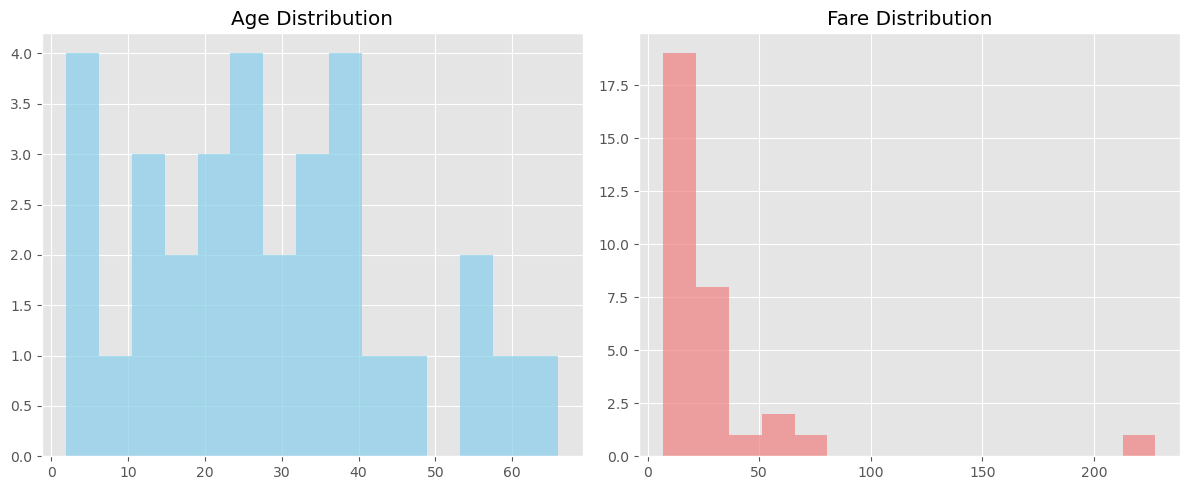

✅ Created your first side-by-side subplots!


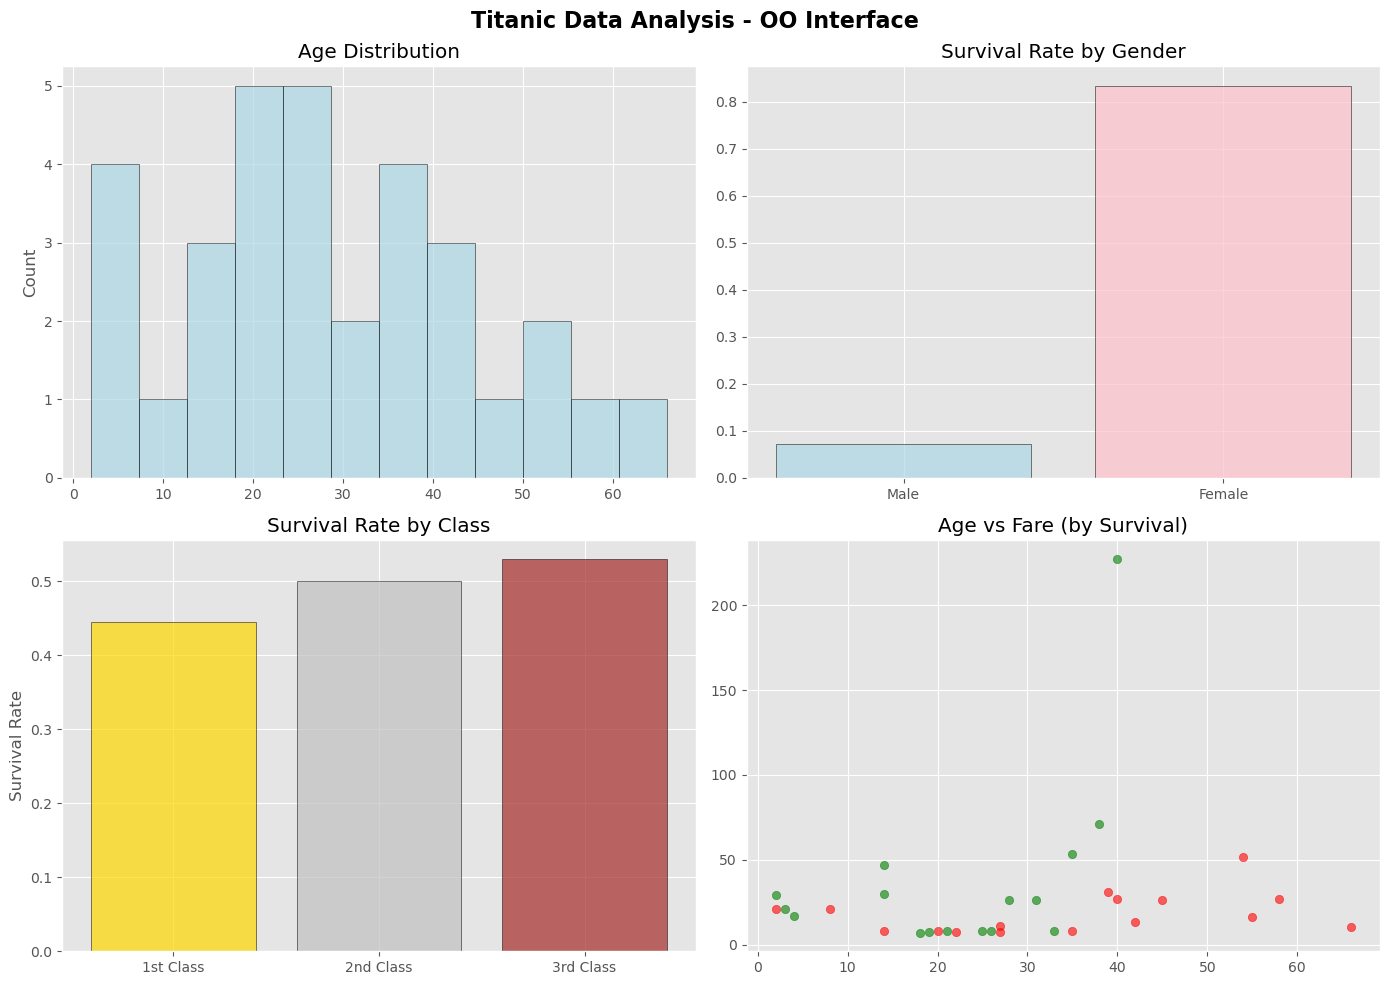

🎉 OO Interface Benefits: Precise control using array indexing (axes[row, col]) and `fig.suptitle()` for overall title.


In [3]:
# Method 1: Simple 1x2 subplot (Pyplot style)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1) # 1 row, 2 columns, position 1
plt.hist(titanic_data['Age'], bins=15, color='skyblue', alpha=0.7)
plt.title('Age Distribution')

plt.subplot(1, 2, 2) # 1 row, 2 columns, position 2
plt.hist(titanic_data['Fare'], bins=15, color='lightcoral', alpha=0.7)
plt.title('Fare Distribution')

plt.tight_layout()
plt.show()

print("✅ Created your first side-by-side subplots!")


# Method 2: 2x2 Grid using Object-Oriented Interface
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Titanic Data Analysis - OO Interface', fontsize=16, fontweight='bold')

# Top left: Age histogram (axes[0, 0])
axes[0, 0].hist(titanic_data['Age'], bins=12, color='lightblue', alpha=0.7, edgecolor='black')
axes[0, 0].set_title('Age Distribution')
axes[0, 0].set_ylabel('Count')

# Top right: Survival by gender (axes[0, 1])
male_survival = titanic_data[titanic_data['Sex'] == 'male']['Survived'].mean()
female_survival = titanic_data[titanic_data['Sex'] == 'female']['Survived'].mean()
axes[0, 1].bar(['Male', 'Female'], [male_survival, female_survival], 
                color=['lightblue', 'pink'], alpha=0.7, edgecolor='black')
axes[0, 1].set_title('Survival Rate by Gender')

# Bottom left: Class survival rates (axes[1, 0])
class_survival = titanic_data.groupby('Pclass')['Survived'].mean()
axes[1, 0].bar(['1st Class', '2nd Class', '3rd Class'], class_survival.values,
                color=['gold', 'silver', 'brown'], alpha=0.7, edgecolor='black')
axes[1, 0].set_title('Survival Rate by Class')
axes[1, 0].set_ylabel('Survival Rate')

# Bottom right: Age vs Fare colored by survival (axes[1, 1])
survivors = titanic_data[titanic_data['Survived'] == 1]
non_survivors = titanic_data[titanic_data['Survived'] == 0]
axes[1, 1].scatter(survivors['Age'], survivors['Fare'], alpha=0.6, color='green', label='Survived')
axes[1, 1].scatter(non_survivors['Age'], non_survivors['Fare'], alpha=0.6, color='red', label='Did not survive')
axes[1, 1].set_title('Age vs Fare (by Survival)')

plt.tight_layout()
plt.show()

print("🎉 OO Interface Benefits: Precise control using array indexing (axes[row, col]) and `fig.suptitle()` for overall title.")

## 2. Advanced Layouts (`subplot2grid`) and Spacing Control

* **`plt.subplot2grid`:** Allows you to create plots with **unequal sizes** that span multiple grid cells using `rowspan` and `colspan`.
* **Spacing:** `plt.tight_layout()` automatically adjusts spacing; use `plt.subplots_adjust` for manual fine-tuning.

🎯 Creating advanced subplot layouts (Unequal sizes)...


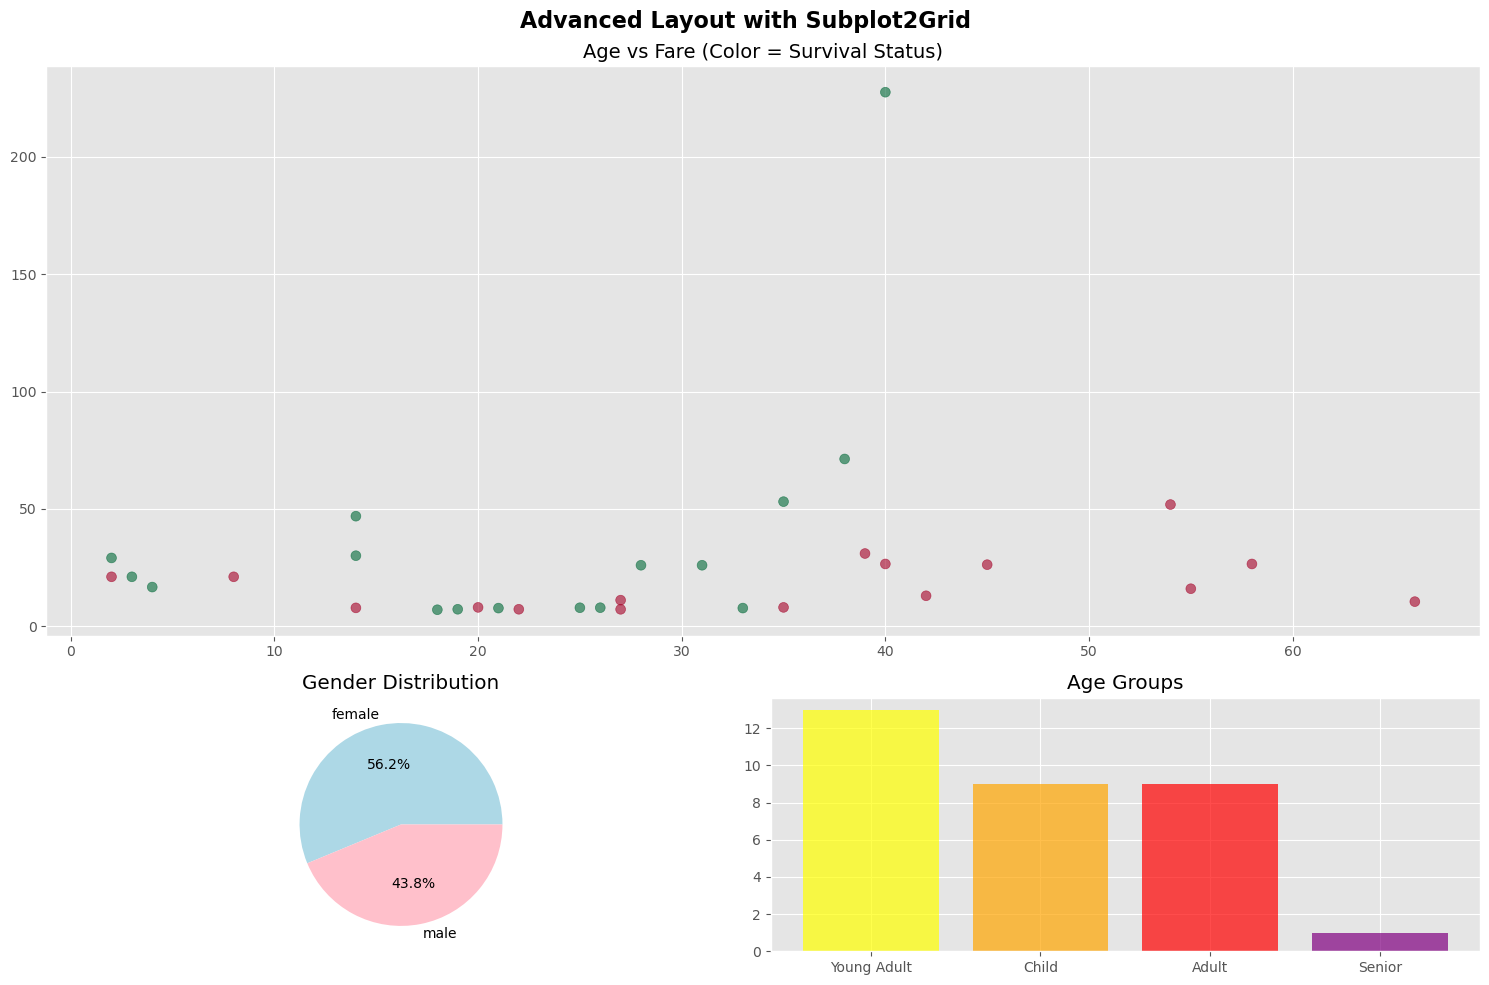

📊 Advanced layout features: subplot2grid() used with colspan/rowspan for unequal plot sizes.


In [4]:
print("🎯 Creating advanced subplot layouts (Unequal sizes)...")

# Unequal sized subplots using subplot2grid
fig = plt.figure(figsize=(15, 10))
fig.suptitle('Advanced Layout with Subplot2Grid', fontsize=16, fontweight='bold')

# ax1: Large plot taking up top half (spans 2 columns and 2 rows)
ax1 = plt.subplot2grid((3, 2), (0, 0), colspan=2, rowspan=2)
ax1.scatter(titanic_data['Age'], titanic_data['Fare'], 
           c=titanic_data['Survived'], cmap='RdYlGn', alpha=0.6, s=50)
ax1.set_title('Age vs Fare (Color = Survival Status)', fontsize=14)

# ax2: Small plot bottom left
ax2 = plt.subplot2grid((3, 2), (2, 0))
gender_counts = titanic_data['Sex'].value_counts()
ax2.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%', 
        colors=['lightblue', 'pink'])
ax2.set_title('Gender Distribution')

# ax3: Small plot bottom right
ax3 = plt.subplot2grid((3, 2), (2, 1))
age_groups = pd.cut(titanic_data['Age'], bins=[0, 18, 35, 60, 100], 
                    labels=['Child', 'Young Adult', 'Adult', 'Senior'])
age_group_counts = age_groups.value_counts()
ax3.bar(age_group_counts.index, age_group_counts.values, 
        color=['yellow', 'orange', 'red', 'purple'], alpha=0.7)
ax3.set_title('Age Groups')

plt.tight_layout()
plt.show()

print("📊 Advanced layout features: subplot2grid() used with colspan/rowspan for unequal plot sizes.")

## 3. Practice Project: Comprehensive Dashboard and Export

We combine all concepts—histograms, bar plots, scatter plots, and unequal layouts—to create a final, production-ready analysis dashboard.

Remember: **Save before showing!**

🎯 PRACTICE PROJECT: Complete Titanic Analysis Dashboard

💾 Dashboard saved as 'part3_subplot_dashboard.png'


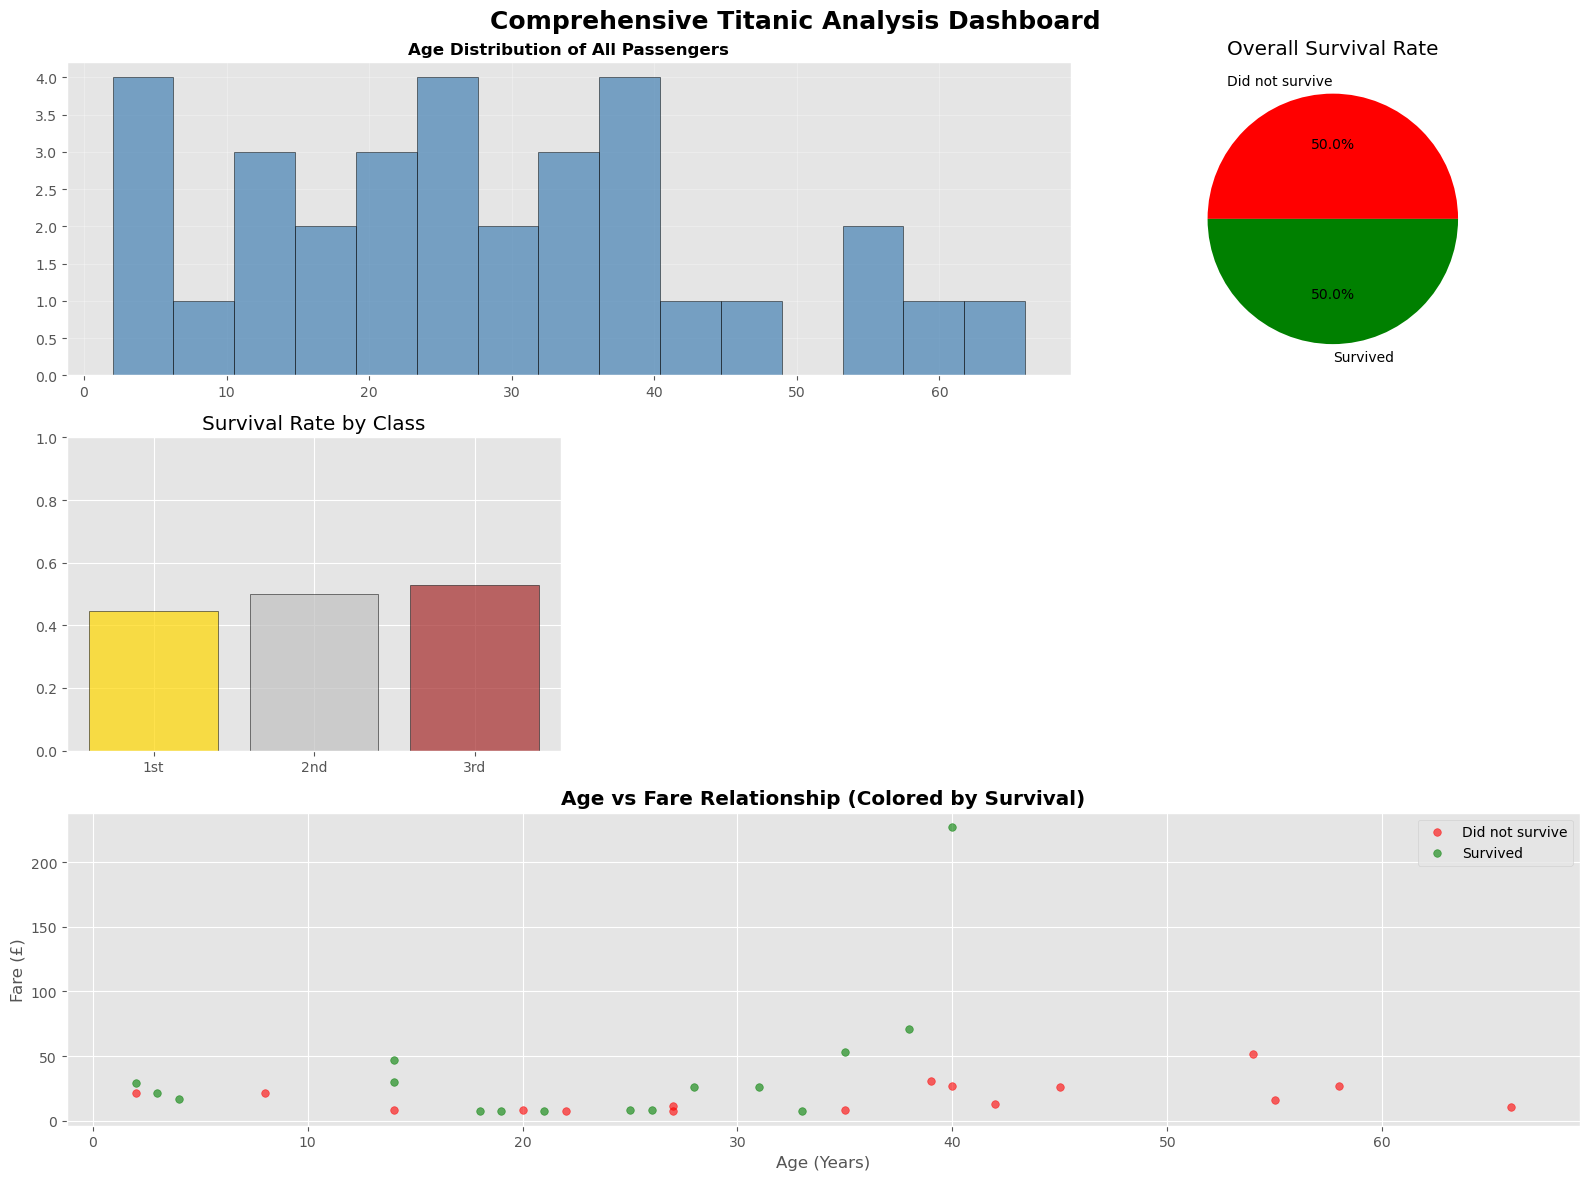

🎯 Part 3 complete! Subplots and dashboards mastered.


In [5]:
print("🎯 PRACTICE PROJECT: Complete Titanic Analysis Dashboard")

fig = plt.figure(figsize=(16, 12))
fig.suptitle('Comprehensive Titanic Analysis Dashboard', fontsize=18, fontweight='bold')

# Plot 1: Age Distribution (top left, large)
ax1 = plt.subplot2grid((3, 3), (0, 0), colspan=2)
ax1.hist(titanic_data['Age'], bins=15, color='steelblue', alpha=0.7, edgecolor='black')
ax1.set_title('Age Distribution of All Passengers', fontsize=12, fontweight='bold')
ax1.grid(True, alpha=0.3)

# Plot 2: Survival Pie Chart (top right)
ax2 = plt.subplot2grid((3, 3), (0, 2))
survival_counts = titanic_data['Survived'].value_counts().sort_index()
ax2.pie(survival_counts.values, 
        labels=['Did not survive', 'Survived'], 
        autopct='%1.1f%%', 
        colors=['red', 'green'])
ax2.set_title('Overall Survival Rate')

# Plot 3: Survival by class (middle left)
ax3 = plt.subplot2grid((3, 3), (1, 0))
class_survival = titanic_data.groupby('Pclass')['Survived'].mean().sort_index()
bars = ax3.bar(['1st', '2nd', '3rd'], class_survival.values, color=['gold', 'silver', 'brown'], alpha=0.7, edgecolor='black')
ax3.set_title('Survival Rate by Class')
ax3.set_ylim(0, 1)

# Plot 6: Age vs Fare scatter (bottom, spanning all columns)
ax6 = plt.subplot2grid((3, 3), (2, 0), colspan=3)
survivors = titanic_data[titanic_data['Survived'] == 1]
non_survivors = titanic_data[titanic_data['Survived'] == 0]
ax6.scatter(non_survivors['Age'], non_survivors['Fare'], alpha=0.6, color='red', label='Did not survive', s=30)
ax6.scatter(survivors['Age'], survivors['Fare'], alpha=0.6, color='green', label='Survived', s=30)
ax6.set_title('Age vs Fare Relationship (Colored by Survival)', fontweight='bold')
ax6.set_xlabel('Age (Years)')
ax6.set_ylabel('Fare (£)')
ax6.legend()

plt.tight_layout()

# 🚨 FIX: Save the figure BEFORE plt.show()
plt.savefig('part3_subplot_dashboard.png', dpi=300, bbox_inches='tight')
print("\n💾 Dashboard saved as 'part3_subplot_dashboard.png'")

plt.show()

print("🎯 Part 3 complete! Subplots and dashboards mastered.")